In [1]:
# Linear Regression: Inverse Matrix Method
# ----------------------------------
#
# This function shows how to use Tensorflow to
# solve linear regression via the matrix inverse.
#
# Given Ax=b, solving for x:
#  x = (t(A) * A)^(-1) * t(A) * b
#  where t(A) is the transpose of A

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.python.framework import ops
ops.reset_default_graph()
# Create graph
sess = tf.Session()

In [36]:
# Create the data
x_vals = np.linspace(0,10,100)
y_vals = x_vals + np.random.normal(0,1,100)
# print(y_vals)
# print(np.random.normal(0,1,100))
# help(np.linspace)
x_vals_column = np.transpose(np.matrix(x_vals))
ones_column = np.transpose(np.matrix(np.repeat(1,100)))
A= np.column_stack((x_vals_column,ones_column))
# Create b matrix
B = np.transpose(np.matrix(y_vals))
# Create tensors
A_tensor = tf.constant(A)
B_tensor = tf.constant(B)
print(A_tensor,B_tensor)

Tensor("Const_8:0", shape=(100, 2), dtype=float64) Tensor("Const_9:0", shape=(100, 1), dtype=float64)


In [26]:
# Matrix inverse solution
t_AA=tf.matmul(tf.transpose(A_tensor),A_tensor)
print(t_AA)
t_AA_inv = tf.matrix_inverse(t_AA)
product = tf.matmul(t_AA_inv,tf.transpose(A_tensor))
solution = tf.matmul(product,B_tensor)
solution_eval = sess.run(solution)
print("solution_eval:", solution_eval)

Tensor("MatMul_16:0", shape=(2, 2), dtype=float64)
solution_eval: [[ 1.01064917]
 [-0.13259232]]


In [30]:
# Extract coefficients
slope = solution_eval[0][0]
y_intercept = solution_eval[1][0]
print('slope: ' + str(slope))
print('y_intercept: ' + str(y_intercept))

slope: 1.01064916763
y_intercept: -0.13259232256


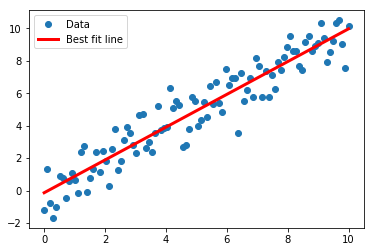

In [34]:
# Get best fit line
best_fit = []
for i in x_vals:
    best_fit.append(slope*i + y_intercept)
    
# Plot the results
plt.plot(x_vals,y_vals,'o',label="Data")
plt.plot(x_vals, best_fit, 'r-', label='Best fit line', linewidth=3)
plt.legend(loc='upper left')
plt.show()